In [26]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
import keras
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import gc
from numba import cuda
sns.set()

In [2]:
gc.collect()

0

In [3]:
cuda.select_device(0)
cuda.close()

In [4]:
images, labels = [], []
for i in os.listdir('images'):
    path = os.listdir(os.path.join('images', i))
    for j in path:
        img = os.path.join('images', i, j)
        img_n = cv2.imread(img)
        if img_n is None:
            print('Wrong path')
        else:
            resized_img = cv2.resize(img_n, (80, 80))
            images.append(resized_img)
            labels.append(i)

In [5]:
print('The number of images in the dataset:', len(images))
print('------------------------------------------------------------')
print('The number of classes in the dataset:', len(os.listdir('images')))
print('-------------------------------------------------------------')
print('The classes in the dataset:', os.listdir('images'))

The number of images in the dataset: 12000
------------------------------------------------------------
The number of classes in the dataset: 5
-------------------------------------------------------------
The classes in the dataset: ['Coast', 'Desert', 'Forest', 'Glacier', 'Mountain']


In [6]:
images_s, labels_s = shuffle(images, labels)

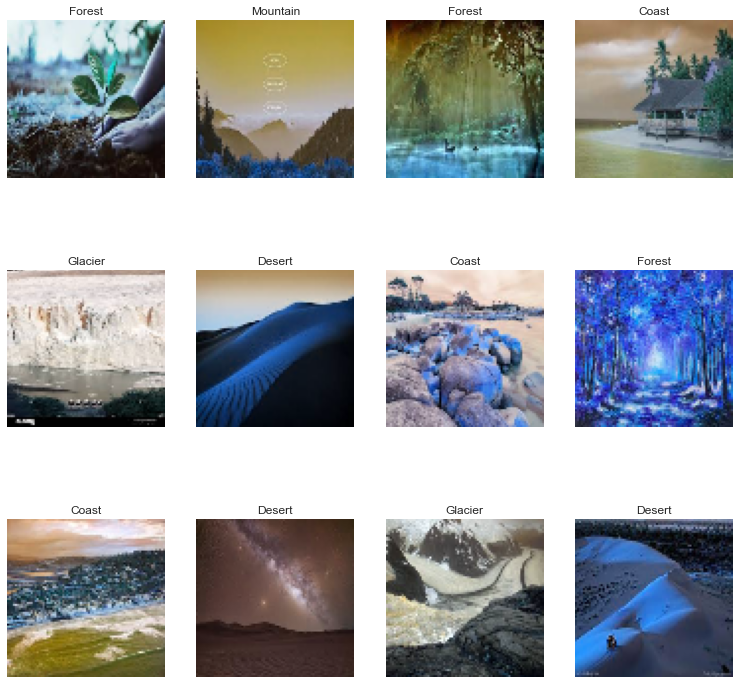

In [7]:
plt.figure(figsize = (13, 13))
for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images_s[i])
    plt.title(labels_s[i])
    plt.axis('off')

In [8]:
le = LabelEncoder()

In [9]:
y = le.fit_transform(labels_s)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(images_s, y, test_size = 0.2, random_state = 101, shuffle = True, 
                                                    stratify = y)

In [11]:
X_train = np.array(X_train)

In [12]:
X_train = X_train / 255

In [13]:
X_test = np.array(X_test)

In [14]:
X_test = X_test / 255

In [15]:
X_train.shape

(9600, 80, 80, 3)

In [16]:
X_test.shape

(2400, 80, 80, 3)

In [17]:
cnn1 = Sequential()

In [18]:
cnn1.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same', input_shape = (80, 80, 3)))
cnn1.add(MaxPooling2D(pool_size = (2, 2)))
cnn1.add(Dropout(0.2))
cnn1.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
cnn1.add(MaxPooling2D(pool_size = (2, 2)))
cnn1.add(Dropout(0.2))
cnn1.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
cnn1.add(MaxPooling2D(pool_size = (2, 2)))
cnn1.add(Dropout(0.2))
cnn1.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
cnn1.add(MaxPooling2D(pool_size = (2, 2)))
cnn1.add(Flatten())
cnn1.add(Dense(128, activation = 'relu'))
cnn1.add(Dropout(0.2))
cnn1.add(Dense(5, activation = 'softmax'))

In [19]:
cnn1.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [20]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 2)

In [21]:
history = cnn1.fit(X_train, y_train, epochs = 100, validation_split = 0.1, callbacks = [early_stopping])

Epoch 1/100
270/270 [==============================] - 62s 76ms/step - loss: 1.0381 - accuracy: 0.5869 - val_loss: 0.9492 - val_accuracy: 0.6542
Epoch 2/100
270/270 [==============================] - 20s 74ms/step - loss: 0.8623 - accuracy: 0.6762 - val_loss: 0.8525 - val_accuracy: 0.6833
Epoch 3/100
270/270 [==============================] - 20s 74ms/step - loss: 0.8058 - accuracy: 0.7013 - val_loss: 0.8835 - val_accuracy: 0.6812
Epoch 4/100
270/270 [==============================] - 20s 74ms/step - loss: 0.7709 - accuracy: 0.7109 - val_loss: 0.8310 - val_accuracy: 0.6854
Epoch 5/100
270/270 [==============================] - 21s 79ms/step - loss: 0.7390 - accuracy: 0.7253 - val_loss: 0.7415 - val_accuracy: 0.7198
Epoch 6/100
270/270 [==============================] - 23s 85ms/step - loss: 0.7105 - accuracy: 0.7354 - val_loss: 0.7605 - val_accuracy: 0.7208
Epoch 7/100
270/270 [==============================] - 25s 94ms/step - loss: 0.6764 - accuracy: 0.7437 - val_loss: 0.7361 - val_ac

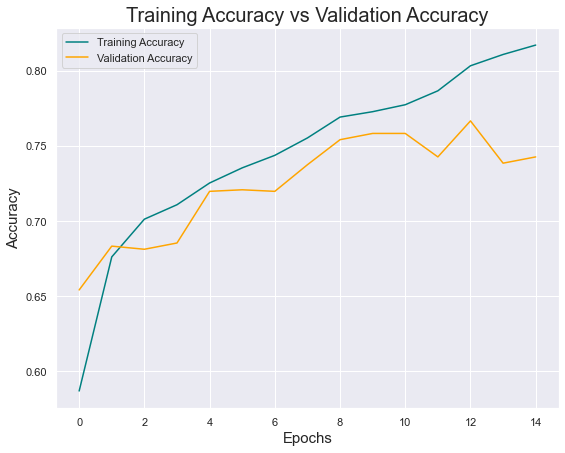

In [24]:
plt.figure(figsize = (9, 7))
plt.plot(history.history['accuracy'], label = 'Training Accuracy', color = 'teal')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy', color = 'orange')
plt.title('Training Accuracy vs Validation Accuracy', fontsize = 20)
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.legend()
plt.show()

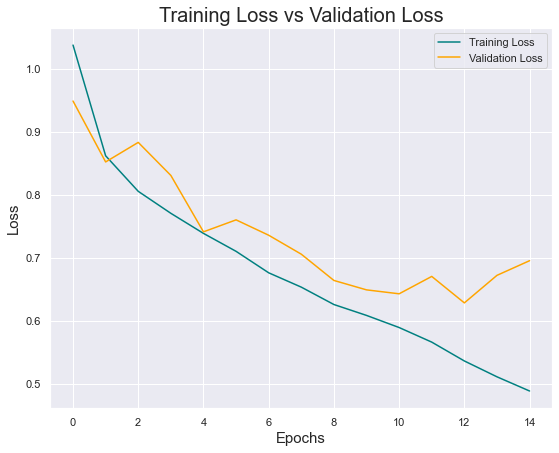

In [25]:
plt.figure(figsize = (9, 7))
plt.plot(history.history['loss'], label = 'Training Loss', color = 'teal')
plt.plot(history.history['val_loss'], label = 'Validation Loss', color = 'orange')
plt.title('Training Loss vs Validation Loss', fontsize = 20)
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel('Loss', fontsize = 15)
plt.legend()
plt.show()

In [28]:
cnn1.evaluate(X_test, y_test)

75/75 [==============================] - 2s 24ms/step - loss: 0.6750 - accuracy: 0.7638


[0.6749545931816101, 0.7637500166893005]

In [29]:
y_p = cnn1.predict(X_test)

In [30]:
y_pred = [np.argmax(i) for i in y_p]

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.75      0.74       480
           1       0.78      0.92      0.84       480
           2       0.88      0.79      0.83       480
           3       0.79      0.84      0.82       480
           4       0.63      0.52      0.57       480

    accuracy                           0.76      2400
   macro avg       0.76      0.76      0.76      2400
weighted avg       0.76      0.76      0.76      2400



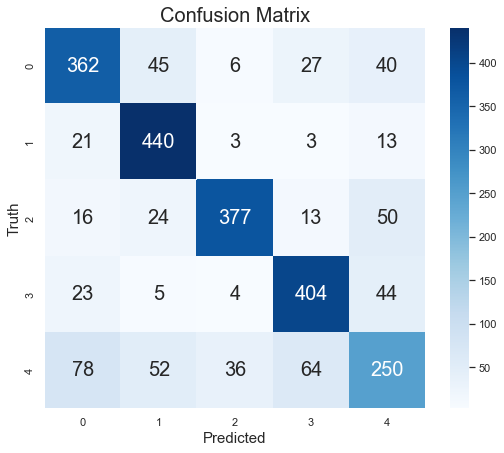

In [32]:
plt.figure(figsize = (9, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, square = True, cbar = True, annot_kws = {'size': 20}, fmt = 'd',
           cmap = 'Blues')
plt.title('Confusion Matrix', fontsize = 20)
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Truth', fontsize = 15)
plt.show()